In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
sns.set()
sns.set_style(style='darkgrid')

# Análise Player Gamers Club

<h3>Temos aqui uma base de dados que representa alguns de nossos usuários e seus dados de jogo:</h3>

Players:
    
A tabela players é formada pela identificação do jogador e sua data de cadastro.

* player_id: identificação do jogador
* cadastrado_em: sua data de cadastro


In [52]:
data_players=pd.read_csv('data/players.csv')
df_player=pd.DataFrame(data_players)
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3645 entries, 0 to 3644
Data columns (total 2 columns):
player_id        3645 non-null int64
cadastrado_em    3645 non-null object
dtypes: int64(1), object(1)
memory usage: 57.1+ KB


_____________
matchmaking_stats_summary <br>
A tabela matchmaking_stats_summary compõe todos os dados do jogador no nosso modo ranqueado:

* player_id: identificação do jogador
* matches_played: quantidade de partidas jogadas
* total_wins: quantidade de vitórias
* total_loss: quantidade de derrotas
* mm_points: saldo de pontos
* kills: total de abates
* death: total de mortes
* assist: total de assistências
* hs: quantidade de tiros na cabeça
* created_at: data de criação do registro
* updated_at: data de última atualização do registro


In [53]:
data_matchmaking_stats_summary=pd.read_csv('data/matchmaking_stats_summary.csv')
df_data_matchmaking_stats_summary=pd.DataFrame(data_matchmaking_stats_summary)
df_data_matchmaking_stats_summary=df_data_matchmaking_stats_summary.merge(df_player, on='player_id')
df_data_matchmaking_stats_summary=df_data_matchmaking_stats_summary.rename(columns={'cadastrado_em':'data_cadastro_player_str'})
df_data_matchmaking_stats_summary['data_cadastro_player_datetime']=df_data_matchmaking_stats_summary['data_cadastro_player_str'].apply(lambda x: pd.to_datetime(x))



In [54]:
df_data_matchmaking_stats_summary.info()
df_data_matchmaking_stats_summary.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 15 columns):
id                               2057 non-null int64
player_id                        2057 non-null int64
matches_played                   2057 non-null int64
total_wins                       2057 non-null int64
total_loss                       2057 non-null int64
mm_points                        2057 non-null int64
assist                           2057 non-null int64
death                            2057 non-null int64
hs                               2057 non-null int64
kills                            2057 non-null int64
is_mm                            2057 non-null int64
created_at                       2057 non-null object
updated_at                       2057 non-null object
data_cadastro_player_str         2057 non-null object
data_cadastro_player_datetime    2057 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(11), object(3)
memory usage: 257.1+ KB


,id,player_id,matches_played,total_wins,total_loss,mm_points,assist,death,hs,kills,is_mm,created_at,updated_at,data_cadastro_player_str,data_cadastro_player_datetime
0,1,354985,1,1,0,3,5,13,6,13,0,2020-02-01 00:47:32,2020-02-01 00:47:32,2017-03-22 23:26:45,2017-03-22 23:26:45
1,2,152268,1,0,1,-1,3,20,2,15,0,2020-02-01 00:54:01,2020-02-01 00:54:01,2016-08-17 00:53:55,2016-08-17 00:53:55
2,3,679247,1,0,1,-1,5,23,4,7,0,2020-02-01 01:00:31,2020-02-01 01:00:31,2018-02-28 23:27:44,2018-02-28 23:27:44
3,4,604607,1,0,1,-1,3,21,8,11,0,2020-02-01 01:03:02,2020-02-01 01:03:02,2018-01-10 23:17:56,2018-01-10 23:17:56
4,40,604607,2,0,2,-2,2,23,9,13,0,2020-02-01 02:36:02,2020-02-01 02:36:02,2018-01-10 23:17:56,2018-01-10 23:17:56


In [55]:
#df_data_matchmaking_stats_summary['player_id'].value_counts()

__________
player_monthly_stats <br>
Por último, temos a tabela player_monthly_stats que contém um sumário mensal de toda a atividade dos jogadores no modo competitivo, que inclui tanto dados ranqueados quanto em outros modos competitivos.

* player_id: identificação do jogador
* game_mode: modo de jogo
* ref_date: data de referência
* total_played: quantidade de partidas
* kills: total de abates
* deaths: total de mortes
* assists: total de assistências
* wins: total de vitórias
* loss: total de derrotas
* headshots: quantidade de tiros na cabeça


In [56]:
data_player_monthly_stats=pd.read_csv('data/player_monthly_stats.csv')
df_player_monthly_stats=pd.DataFrame(data_player_monthly_stats)
df_player_monthly_stats=df_player_monthly_stats.merge(df_player, on='player_id')
df_player_monthly_stats=df_player_monthly_stats.rename(columns={'cadastrado_em':'data_cadastro_player_str'})
df_player_monthly_stats['data_cadastro_player_datetime']=df_player_monthly_stats['data_cadastro_player_str'].apply(lambda x: pd.to_datetime(x))


In [57]:
df_player_monthly_stats['game_mode'].unique()

array(['COMPETITIVO'], dtype=object)

In [58]:
df_player_monthly_stats.info()
df_player_monthly_stats.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3623 entries, 0 to 3622
Data columns (total 13 columns):
id                               3623 non-null int64
game_mode                        3623 non-null object
player_id                        3623 non-null int64
ref_date                         3623 non-null object
total_played                     3623 non-null int64
kills                            3623 non-null int64
assists                          3623 non-null int64
deaths                           3623 non-null int64
wins                             3623 non-null int64
loss                             3623 non-null int64
headshots                        3623 non-null int64
data_cadastro_player_str         3623 non-null object
data_cadastro_player_datetime    3623 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(9), object(3)
memory usage: 396.3+ KB


,id,game_mode,player_id,ref_date,total_played,kills,assists,deaths,wins,loss,headshots,data_cadastro_player_str,data_cadastro_player_datetime
0,1,COMPETITIVO,354985,2020-02-01,85083,579,130,614,18,16,202,2017-03-22 23:26:45,2017-03-22 23:26:45
1,2,COMPETITIVO,152268,2020-02-01,2567,17,3,20,0,1,2,2016-08-17 00:53:55,2016-08-17 00:53:55
2,3,COMPETITIVO,679247,2020-02-01,5864,39,14,44,2,1,18,2018-02-28 23:27:44,2018-02-28 23:27:44
3,4,COMPETITIVO,604607,2020-02-01,5416,42,5,44,0,3,17,2018-01-10 23:17:56,2018-01-10 23:17:56
4,5,COMPETITIVO,325203,2020-02-01,4850,53,4,32,1,1,18,2017-02-22 13:04:37,2017-02-22 13:04:37


In [59]:
#df_player_monthly_stats['player_id'].value_counts()

_____________

<h3>Para aquecimento</h3><br>
1. Quantos usuários únicos não jogaram após o dia 03/02/2020?<br>
2. Quantos usuários únicos jogaram em fevereiro após o dia 06/02/2020?<br>
3. Em qual dia mais jogadores deixaram de jogar no mês de fevereiro?<br>


In [60]:
# 1 Quantos usuários únicos não jogaram após o dia 03/02/2020?
df_played_before_040220=df_data_matchmaking_stats_summary.loc[df_data_matchmaking_stats_summary['updated_at']<'2020-02-04 00:00:00']
id_player_played_before_040220=df_played_before_040220['player_id'].unique()

In [61]:
df_played_after_040220=df_data_matchmaking_stats_summary.loc[df_data_matchmaking_stats_summary['updated_at']>='2020-02-04 00:00:00']
players_played_after_040220=df_data_matchmaking_stats_summary.loc[df_data_matchmaking_stats_summary['updated_at']>='2020-02-04 00:00:00']['player_id']

In [62]:
usuarios_quer_nao_jogaram_apos_030220=[]
for i in id_player_played_before_040220:
    if i not in players_played_after_040220:
        usuarios_quer_nao_jogaram_apos_030220.append(i)
       

In [63]:
print(f' A quantidade de usuários que não jogaram após o dia 03/02/2020 é: {len(usuarios_quer_nao_jogaram_apos_030220)}')

 A quantidade de usuários que não jogaram após o dia 03/02/2020 é: 1040


____________________________________

In [64]:
2# Quantos usuários únicos jogaram em fevereiro após o dia 06/02/2020?
df_played_after_060220=df_data_matchmaking_stats_summary.loc[(df_data_matchmaking_stats_summary['updated_at']>='2020-02-06 00:00:00') &(df_data_matchmaking_stats_summary['updated_at']<='2020-02-28 23:59:59')]
df_played_after_070220=df_data_matchmaking_stats_summary.loc[(df_data_matchmaking_stats_summary['updated_at']>='2020-02-07 00:00:00') &(df_data_matchmaking_stats_summary['updated_at']<='2020-02-28 23:59:59')]
numero_players_jogaram_apos_060220=df_played_after_060220['player_id'].nunique()
numero_players_jogaram_apos_070220=df_played_after_070220['player_id'].nunique()
print(f" A quantidade de usuários que jogaram após o dia 06/02/2020 00:00:00 é: {numero_players_jogaram_apos_060220}")
print(f" A quantidade de usuários que jogaram após do dia 07/02/2020 00:00:00 é: {numero_players_jogaram_apos_070220}")

 A quantidade de usuários que jogaram após o dia 06/02/2020 00:00:00 é: 330
 A quantidade de usuários que jogaram após do dia 07/02/2020 00:00:00 é: 0


In [65]:
3# Em qual dia mais jogadores deixaram de jogar no mês de fevereiro?
from datetime import datetime
def ultima_partida(id_player,df_data=df_data_matchmaking_stats_summary):
    dia_ultima_partida_horario_completo=df_data_matchmaking_stats_summary.loc[df_data_matchmaking_stats_summary['player_id']==id_player]['updated_at'].max()
    dia_ultima_partida_time_object=datetime.strptime(dia_ultima_partida_horario_completo, '%Y-%m-%d %H:%M:%S')
    dia_ultima_partida=dia_ultima_partida_time_object.strftime('%Y-%m-%d')
    return dia_ultima_partida


In [66]:
players_id=df_data_matchmaking_stats_summary['player_id'].unique()
ultima_partida_players={}
for id_player in players_id:
    ultima_partida_jogador=ultima_partida(id_player)
    
    ultima_partida_players.update({id_player:ultima_partida_jogador})

Text(0, 0.5, 'Frequencia')

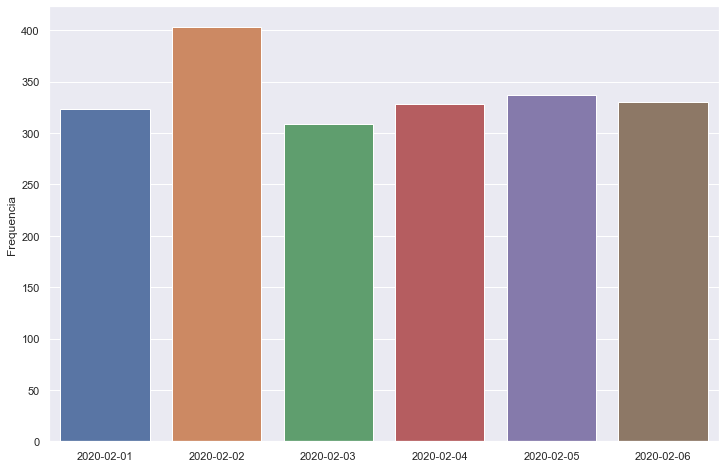

In [67]:
lista_de_dias_ocorrentes=np.unique(list(ultima_partida_players.values()))
plt.figure(figsize=(12,8))
sns.countplot(list(ultima_partida_players.values()),order=lista_de_dias_ocorrentes)
plt.ylabel('Frequencia')

## O dia com mais desistências foi 02/02/2020
_______________

## Analise Exploratória

In [75]:
df_player_monthly_stats.head()
df_player_monthly_stats.describe()


,id,player_id,total_played,kills,assists,deaths,wins,loss,headshots
count,3623.000000,3.623000e+03,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000
mean,1846.374275,6.160441e+05,57798.197902,403.471709,89.321833,406.210047,10.723710,11.344742,159.852608
std,1067.503445,3.891945e+05,60771.890329,441.781318,96.995740,436.208344,11.708761,12.213186,185.047471
min,1.000000,6.600000e+01,251.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,922.500000,2.658745e+05,14382.000000,96.500000,22.000000,101.000000,2.000000,3.000000,35.000000
50%,1843.000000,6.239590e+05,37491.000000,255.000000,56.000000,262.000000,7.000000,7.000000,97.000000
75%,2768.500000,9.451260e+05,80612.500000,554.000000,121.000000,553.500000,15.000000,16.000000,217.000000
max,3700.000000,1.283457e+06,461556.000000,3476.000000,818.000000,3341.000000,89.000000,93.000000,1674.000000


3623

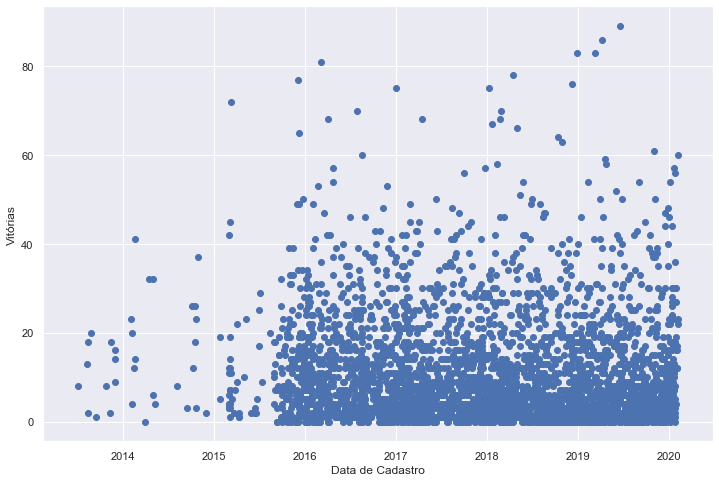

In [90]:
plt.figure(figsize=(12,8))
plt.scatter(x=df_player_monthly_stats['data_cadastro_player_datetime'],y=df_player_monthly_stats['wins'])
plt.ylabel('Vitórias')
plt.xlabel('Data de Cadastro')
#plt.title()
wins_time.savefig('wins_time.png')

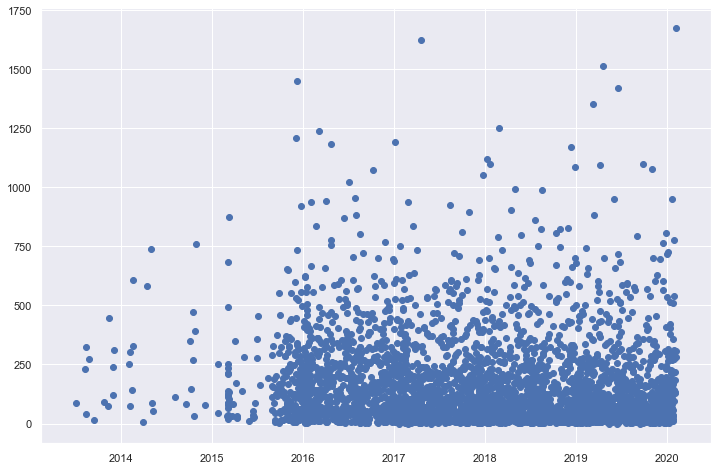

In [69]:
#sns.lmplot(x='data_cadastro_player_datetime', y='headshots', data=df_player_monthly_stats)
plt.figure(figsize=(12,8))
plt.scatter(x=df_player_monthly_stats['data_cadastro_player_datetime'],y=df_player_monthly_stats['headshots'])

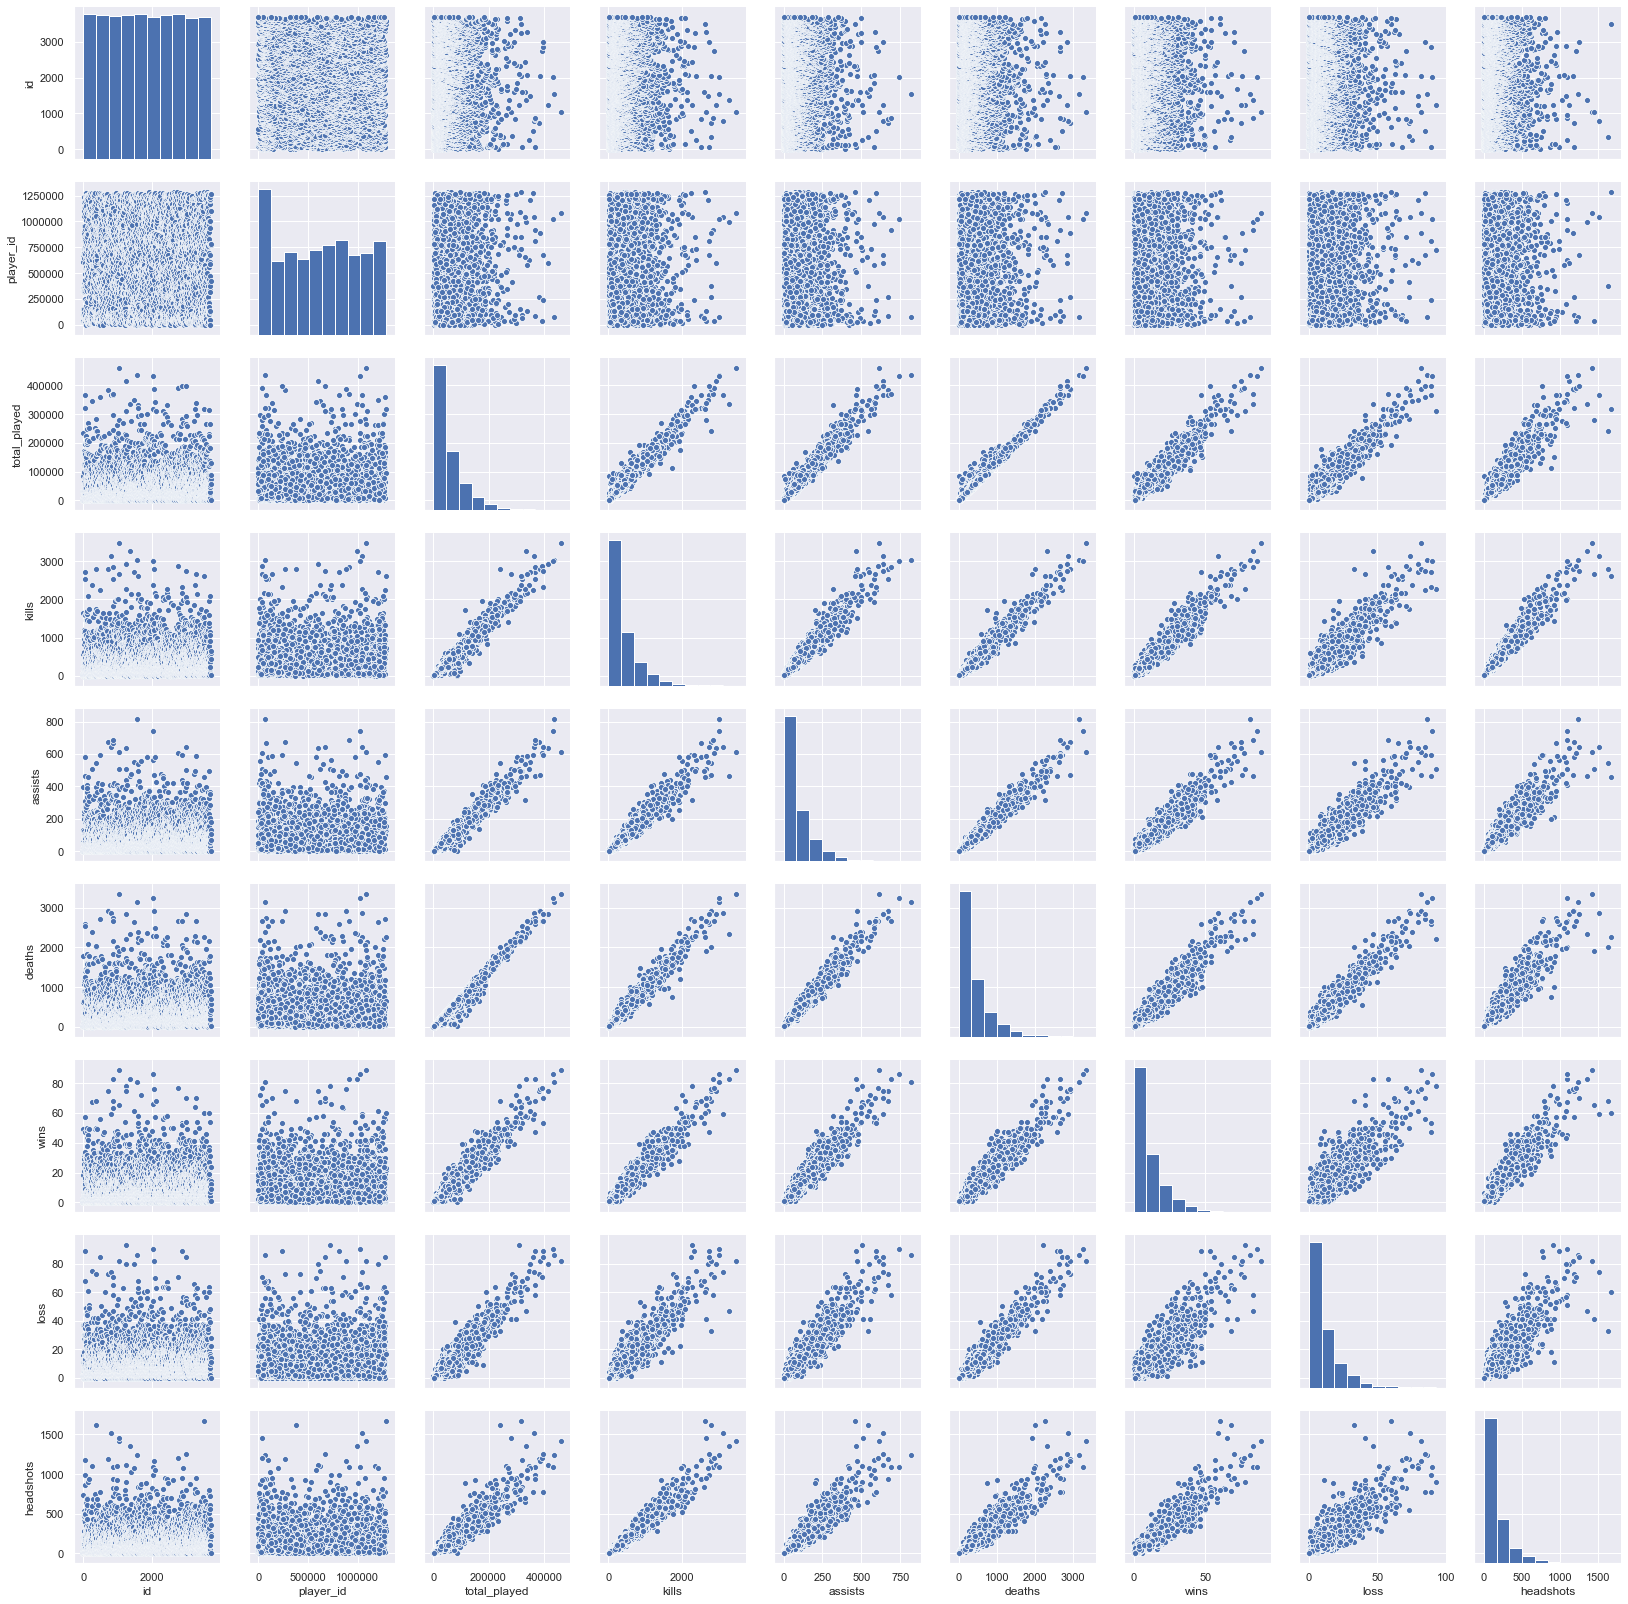

In [72]:
mothly_pairplot=sns.pairplot(df_player_monthly_stats)
mothly_pairplot.savefig('mothly_pairplot.png')

<Figure size 864x576 with 0 Axes>

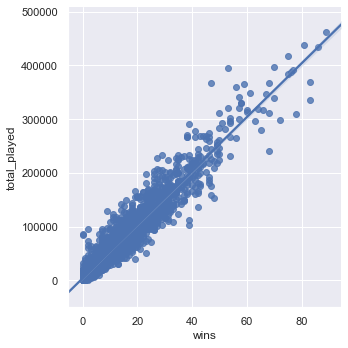

In [93]:
plt.figure(figsize=(12,8))
sns.lmplot(x='wins', y='total_played', data=df_player_monthly_stats)

<Figure size 864x576 with 0 Axes>

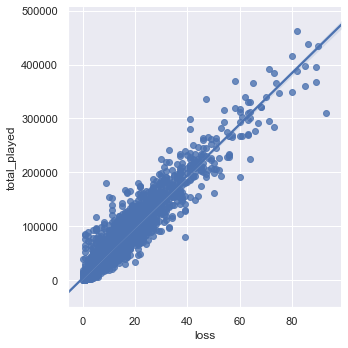

In [94]:
plt.figure(figsize=(12,8))
sns.lmplot(x='loss', y='total_played', data=df_player_monthly_stats)

In [96]:
# KDA analysis
df_data_matchmaking_stats_summary['KDA']=(df_data_matchmaking_stats_summary['kills']+df_data_matchmaking_stats_summary['assist'])/df_data_matchmaking_stats_summary['death']
df_data_matchmaking_stats_summary['accuracy']=df_data_matchmaking_stats_summary['hs']/df_data_matchmaking_stats_summary['kills']
###
df_player_monthly_stats['KDA']=(df_player_monthly_stats['kills']+df_player_monthly_stats['assists'])/df_player_monthly_stats['deaths']
df_player_monthly_stats['accuracy']=df_player_monthly_stats['headshots']/df_player_monthly_stats['kills']

In [114]:
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

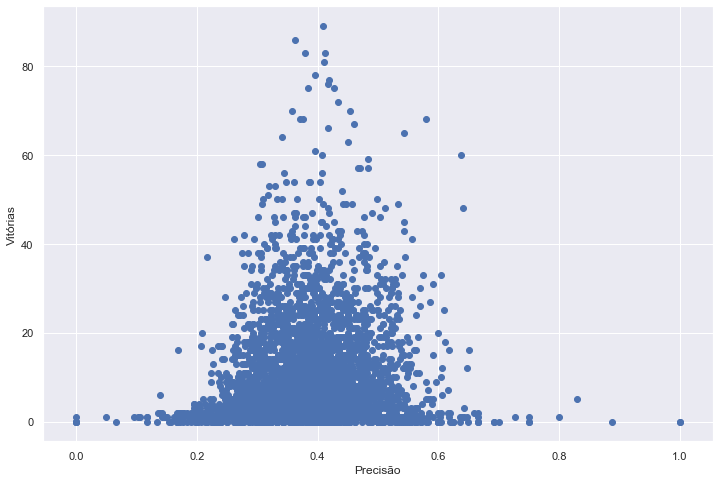

In [113]:
plt.figure(figsize=(12,8))
plt.ylabel('Vitórias')
plt.xlabel('Precisão')
plt.scatter(x=df_player_monthly_stats['accuracy'],y=df_player_monthly_stats['wins'])

In [119]:
df_player_monthly_stats.loc[df_player_monthly_stats['accuracy']<0.35]['wins'].mean()

8.963696369636963

In [100]:
#matchmaking_parplot=sns.pairplot(df_data_matchmaking_stats_summary)
matchmaking_parplot.savefig('matchmaking_parplot.png')

In [120]:
df_player_monthly_stats.loc[df_player_monthly_stats['accuracy']>=0.35]['wins'].mean()

11.612863070539419

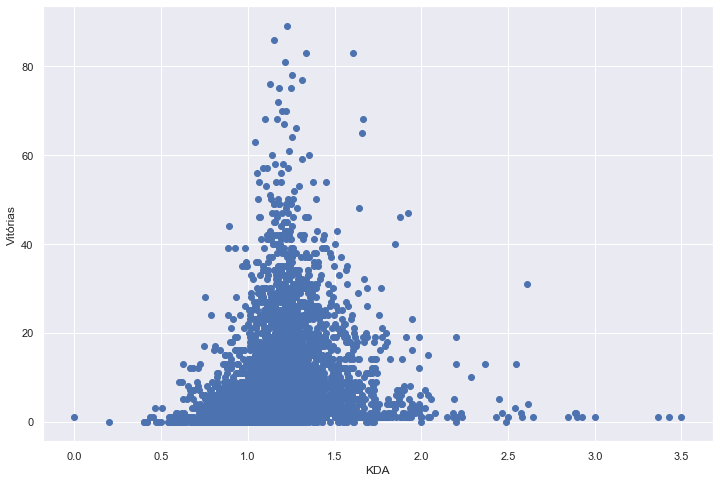

In [110]:
plt.figure(figsize=(12,8))
plt.ylabel('Vitórias')
plt.xlabel('KDA')
plt.scatter(x=df_player_monthly_stats.loc[df_player_monthly_stats['KDA']<6]['KDA'],y=df_player_monthly_stats.loc[df_player_monthly_stats['KDA']<6]['wins'])

In [103]:
df_player_monthly_stats.loc[df_player_monthly_stats['KDA']<1.15]['wins'].mean()

7.8558558558558556

In [104]:
df_player_monthly_stats.loc[df_player_monthly_stats['KDA']>=1.15]['wins'].mean()

12.622018348623854

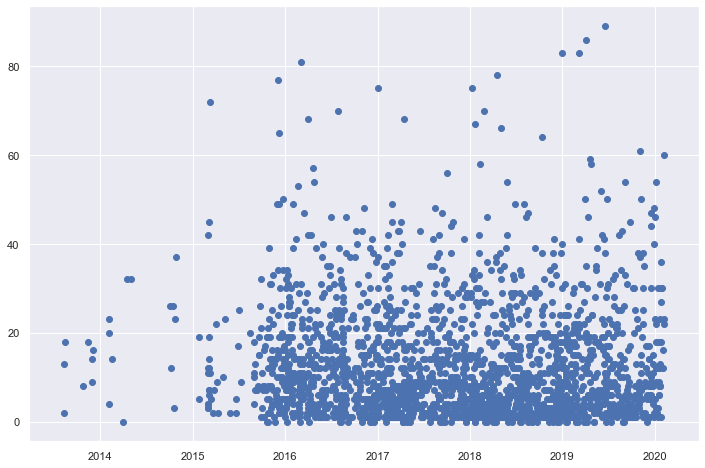

In [109]:
plt.figure(figsize=(12,8))
plt.scatter(x=df_player_monthly_stats.loc[df_player_monthly_stats['KDA']>=1.15][''],y=df_player_monthly_stats.loc[df_player_monthly_stats['KDA']>=1.15]['wins'])